In [0]:
dbutils.fs.unmount('/mnt/finalproject')

/mnt/finalproject has been unmounted.


True

In [0]:
dbutils.fs.mount(
    source="wasbs://dataset@easfinal1.blob.core.windows.net/",
    mount_point="/mnt/finalproject",
    extra_configs={f"fs.azure.account.key.easfinal1.blob.core.windows.net":"*"}
)

True

In [0]:
%fs
ls mnt/finalproject

path name size modificationTime dbfs:/mnt/finalproject/WA_Fn-UseC_-HR-Employee-Attrition.csv WA_Fn-UseC_-HR-Employee-Attrition.csv 227977 1752498205000

In [0]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

df_raw = spark.read.option("header", True).option("inferSchema", True).csv("dbfs:/mnt/finalproject/WA_Fn-UseC_-HR-Employee-Attrition.csv")  
df_raw.write.format("delta").mode("overwrite").saveAsTable("employee_attrition_bronze")

In [0]:
df_raw.display(5)

Age Attrition BusinessTravel DailyRate Department DistanceFromHome Education EducationField EmployeeCount EmployeeNumber EnvironmentSatisfaction Gender HourlyRate JobInvolvement JobLevel JobRole JobSatisfaction MaritalStatus MonthlyIncome MonthlyRate NumCompaniesWorked Over18 OverTime PercentSalaryHike PerformanceRating RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager 41 Yes Travel_Rarely 1102 Sales 1 2 Life Sciences 1 1 2 Female 94 3 2 Sales Executive 4 Single 5993 19479 8 Y Yes 11 3 1 80 0 8 0 1 6 4 0 5 49 No Travel_Frequently 279 Research & Development 8 1 Life Sciences 1 2 3 Male 61 2 2 Research Scientist 2 Married 5130 24907 1 Y No 23 4 4 80 1 10 3 3 10 7 1 7 37 Yes Travel_Rarely 1373 Research & Development 2 2 Other 1 4 4 Male 92 2 1 Laboratory Technician 3 Single 2090 2396 6 Y Yes 15 3 2 80 0 7 3 3 0 0 0 0 33 No Travel_Frequently 1392 Research & Development 3 4 Life Sciences 1 5 4 Female 56 3 1 Research Scientist 3 Married 2909 23159 1 Y Yes 11 3 3 80 0 8 3 3 8 7 3 0 27 No Travel_Rarely 591 Research & Development 2 1 Medical 1 7 1 Male 40 3 1 Laboratory Technician 2 Married 3468 16632 9 Y No 12 3 4 80 1 6 3 3 2 2 2 2 32 No Travel_Frequently 1005 Research & Development 2 2 Life Sciences 1 8 4 Male 79 3 1 Laboratory Technician 4 Single 3068 11864 0 Y No 13 3 3 80 0 8 2 2 7 7 3 6 59 No Travel_Rarely 1324 Research & Development 3 3 Medical 1 10 3 Female 81 4 1 Laboratory Technician 1 Married 2670 9964 4 Y Yes 20 4 1 80 3 12 3 2 1 0 0 0 30 No Travel_Rarely 1358 Research & Development 24 1 Life Sciences 1 11 4 Male 67 3 1 Laboratory Technician 3 Divorced 2693 13335 1 Y No 22 4 2 80 1 1 2 3 1 0 0 0 38 No Travel_Frequently 216 Research & Development 23 3 Life Sciences 1 12 4 Male 44 2 3 Manufacturing Director 3 Single 9526 8787 0 Y No 21 4 2 80 0 10 2 3 9 7 1 8 36 No Travel_Rarely 1299 Research & Development 27 3 Medical 1 13 3 Male 94 3 2 Healthcare Representative 3 Married 5237 16577 6 Y No 13 3 2 80 2 17 3 2 7 7 7 7 35 No Travel_Rarely 809 Research & Development 16 3 Medical 1 14 1 Male 84 4 1 Laboratory Technician 2 Married 2426 16479 0 Y No 13 3 3 80 1 6 5 3 5 4 0 3 29 No Travel_Rarely 153 Research & Development 15 2 Life Sciences 1 15 4 Female 49 2 2 Laboratory Technician 3 Single 4193 12682 0 Y Yes 12 3 4 80 0 10 3 3 9 5 0 8 31 No Travel_Rarely 670 Research & Development 26 1 Life Sciences 1 16 1 Male 31 3 1 Research Scientist 3 Divorced 2911 15170 1 Y No 17 3 4 80 1 5 1 2 5 2 4 3 34 No Travel_Rarely 1346 Research & Development 19 2 Medical 1 18 2 Male 93 3 1 Laboratory Technician 4 Divorced 2661 8758 0 Y No 11 3 3 80 1 3 2 3 2 2 1 2 28 Yes Travel_Rarely 103 Research & Development 24 3 Life Sciences 1 19 3 Male 50 2 1 Laboratory Technician 3 Single 2028 12947 5 Y Yes 14 3 2 80 0 6 4 3 4 2 0 3 29 No Travel_Rarely 1389 Research & Development 21 4 Life Sciences 1 20 2 Female 51 4 3 Manufacturing Director 1 Divorced 9980 10195 1 Y No 11 3 3 80 1 10 1 3 10 9 8 8 32 No Travel_Rarely 334 Research & Development 5 2 Life Sciences 1 21 1 Male 80 4 1 Research Scientist 2 Divorced 3298 15053 0 Y Yes 12 3 4 80 2 7 5 2 6 2 0 5 22 No Non-Travel 1123 Research & Development 16 2 Medical 1 22 4 Male 96 4 1 Laboratory Technician 4 Divorced 2935 7324 1 Y Yes 13 3 2 80 2 1 2 2 1 0 0 0 53 No Travel_Rarely 1219 Sales 2 4 Life Sciences 1 23 1 Female 78 2 4 Manager 4 Married 15427 22021 2 Y No 16 3 3 80 0 31 3 3 25 8 3 7 38 No Travel_Rarely 371 Research & Development 2 3 Life Sciences 1 24 4 Male 45 3 1 Research Scientist 4 Single 3944 4306 5 Y Yes 11 3 3 80 0 6 3 3 3 2 1 2 24 No Non-Travel 673 Research & Development 11 2 Other 1 26 1 Female 96 4 2 Manufacturing Director 3 Divorced 4011 8232 0 Y No 18 3 4 80 1 5 5 2 4 2 1 3 36 Yes Travel_Rarely 1218 Sales 9 4 Life Sciences 1 27 3 Male 82 2 1 Sales Representative 1 Single 3407 6986 7 Y No 23 4 2 80 0 10 4 3 5 3 0 3 34 No Travel_Rarely 419 Research & Develop

In [0]:
# Schema and record count
df_raw.printSchema()
print(f"Total Records: {df_raw.count()}")


root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [0]:
df_raw.groupBy("Attrition").count().show()



+---------+-----+
|Attrition|count|
+---------+-----+
|       No| 1233|
|      Yes|  237|
+---------+-----+



In [0]:
df_raw.select("Age", "MonthlyIncome", "YearsAtCompany", "DistanceFromHome", "JobSatisfaction").describe().show()

+-------+------------------+-----------------+------------------+-----------------+------------------+
|summary|               Age|    MonthlyIncome|    YearsAtCompany| DistanceFromHome|   JobSatisfaction|
+-------+------------------+-----------------+------------------+-----------------+------------------+
|  count|              1470|             1470|              1470|             1470|              1470|
|   mean|36.923809523809524|6502.931292517007|7.0081632653061225| 9.19251700680272|2.7285714285714286|
| stddev| 9.135373489136734|4707.956783097995| 6.126525152403566|8.106864435666084|1.1028461230547149|
|    min|                18|             1009|                 0|                1|                 1|
|    max|                60|            19999|                40|               29|                 4|
+-------+------------------+-----------------+------------------+-----------------+------------------+



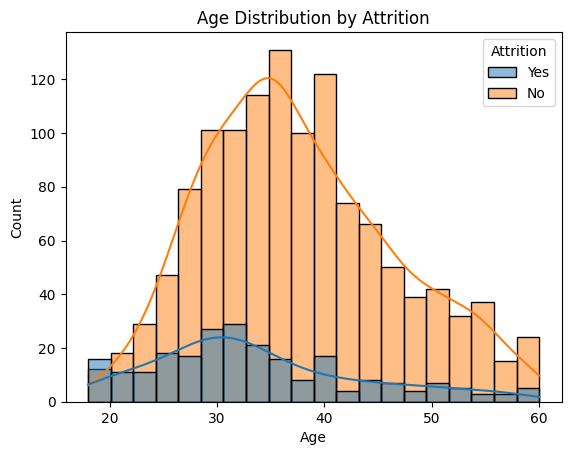

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark to Pandas
pdf =df_raw.select("Age", "MonthlyIncome", "DistanceFromHome", "Attrition").toPandas()

# Plot histograms
sns.histplot(data=pdf, x="Age", hue="Attrition", kde=True, bins=20)
plt.title("Age Distribution by Attrition")
plt.show()


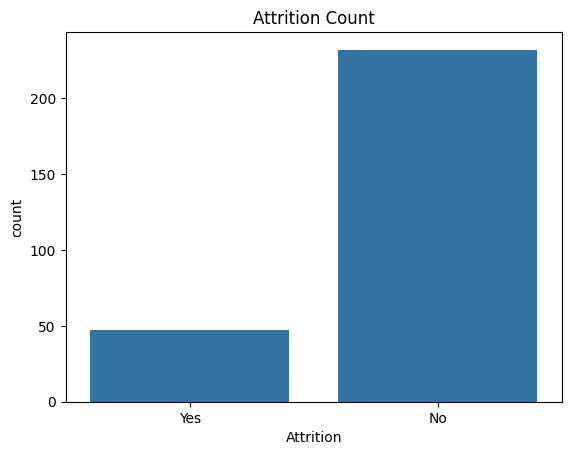

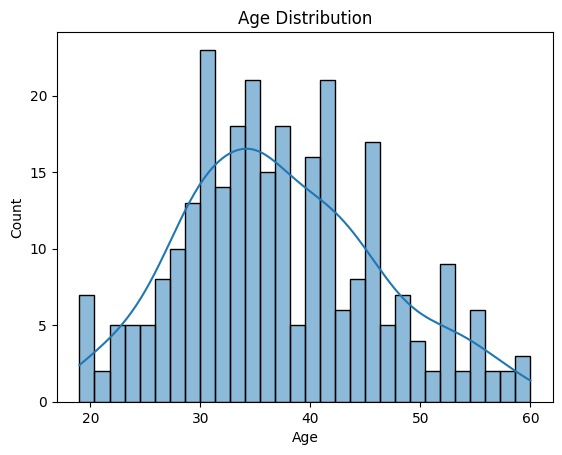

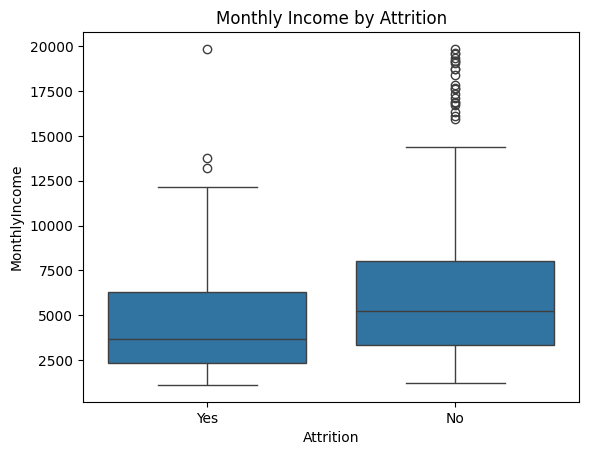

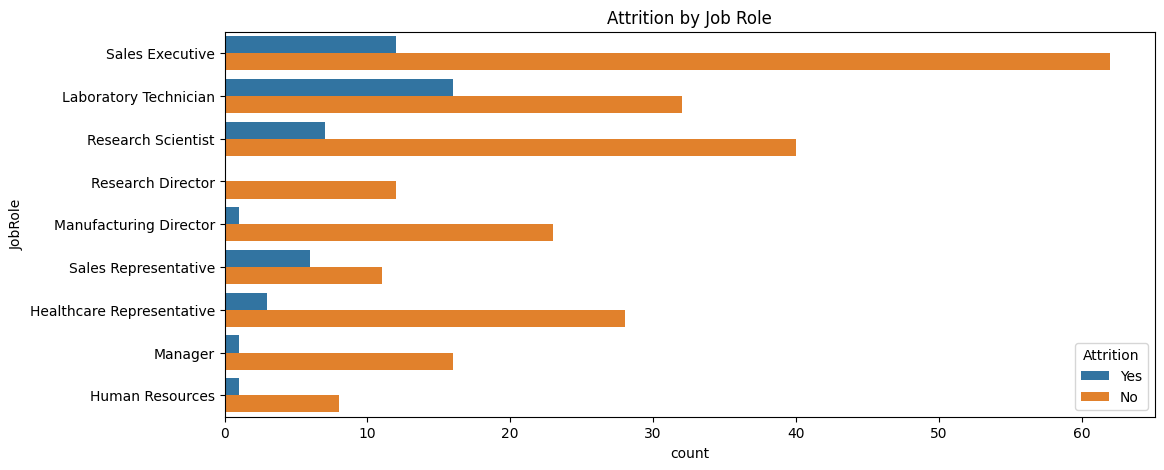

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert a sample to Pandas
pdf = df_raw.sample(False, 0.2, seed=1).toPandas()

# Attrition count
sns.countplot(x="Attrition", data=pdf)
plt.title("Attrition Count")
plt.show()

# Age distribution
sns.histplot(pdf["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Monthly Income vs Attrition
sns.boxplot(x="Attrition", y="MonthlyIncome", data=pdf)
plt.title("Monthly Income by Attrition")
plt.show()

# Attrition by Job Role
plt.figure(figsize=(12,5))
sns.countplot(y="JobRole", hue="Attrition", data=pdf)
plt.title("Attrition by Job Role")
plt.show()


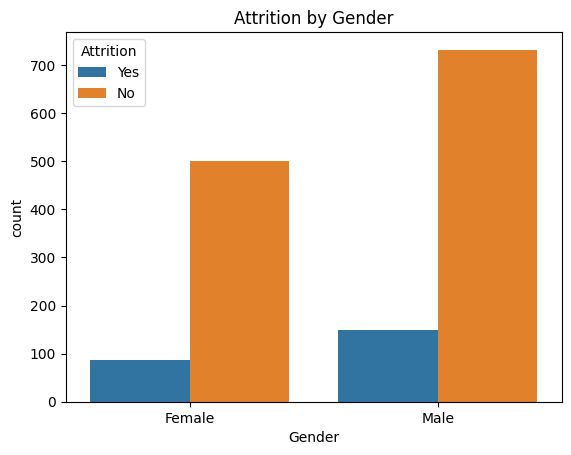

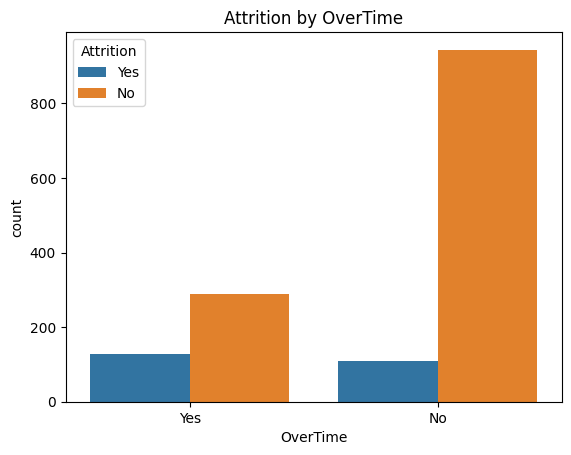

In [0]:
# Convert PySpark DataFrame to Pandas
pdf = df_raw.select("Gender", "OverTime", "Attrition").toPandas()

# Now use Seaborn to plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=pdf, x="Gender", hue="Attrition")
plt.title("Attrition by Gender")
plt.show()

sns.countplot(data=pdf, x="OverTime", hue="Attrition")
plt.title("Attrition by OverTime")
plt.show()


In [0]:
%sql
SELECT * FROM employee_attrition_bronze;

Age Attrition BusinessTravel DailyRate Department DistanceFromHome Education EducationField EmployeeCount EmployeeNumber EnvironmentSatisfaction Gender HourlyRate JobInvolvement JobLevel JobRole JobSatisfaction MaritalStatus MonthlyIncome MonthlyRate NumCompaniesWorked Over18 OverTime PercentSalaryHike PerformanceRating RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager 41 Yes Travel_Rarely 1102 Sales 1 2 Life Sciences 1 1 2 Female 94 3 2 Sales Executive 4 Single 5993 19479 8 Y Yes 11 3 1 80 0 8 0 1 6 4 0 5 49 No Travel_Frequently 279 Research & Development 8 1 Life Sciences 1 2 3 Male 61 2 2 Research Scientist 2 Married 5130 24907 1 Y No 23 4 4 80 1 10 3 3 10 7 1 7 37 Yes Travel_Rarely 1373 Research & Development 2 2 Other 1 4 4 Male 92 2 1 Laboratory Technician 3 Single 2090 2396 6 Y Yes 15 3 2 80 0 7 3 3 0 0 0 0 33 No Travel_Frequently 1392 Research & Development 3 4 Life Sciences 1 5 4 Female 56 3 1 Research Scientist 3 Married 2909 23159 1 Y Yes 11 3 3 80 0 8 3 3 8 7 3 0 27 No Travel_Rarely 591 Research & Development 2 1 Medical 1 7 1 Male 40 3 1 Laboratory Technician 2 Married 3468 16632 9 Y No 12 3 4 80 1 6 3 3 2 2 2 2 32 No Travel_Frequently 1005 Research & Development 2 2 Life Sciences 1 8 4 Male 79 3 1 Laboratory Technician 4 Single 3068 11864 0 Y No 13 3 3 80 0 8 2 2 7 7 3 6 59 No Travel_Rarely 1324 Research & Development 3 3 Medical 1 10 3 Female 81 4 1 Laboratory Technician 1 Married 2670 9964 4 Y Yes 20 4 1 80 3 12 3 2 1 0 0 0 30 No Travel_Rarely 1358 Research & Development 24 1 Life Sciences 1 11 4 Male 67 3 1 Laboratory Technician 3 Divorced 2693 13335 1 Y No 22 4 2 80 1 1 2 3 1 0 0 0 38 No Travel_Frequently 216 Research & Development 23 3 Life Sciences 1 12 4 Male 44 2 3 Manufacturing Director 3 Single 9526 8787 0 Y No 21 4 2 80 0 10 2 3 9 7 1 8 36 No Travel_Rarely 1299 Research & Development 27 3 Medical 1 13 3 Male 94 3 2 Healthcare Representative 3 Married 5237 16577 6 Y No 13 3 2 80 2 17 3 2 7 7 7 7 35 No Travel_Rarely 809 Research & Development 16 3 Medical 1 14 1 Male 84 4 1 Laboratory Technician 2 Married 2426 16479 0 Y No 13 3 3 80 1 6 5 3 5 4 0 3 29 No Travel_Rarely 153 Research & Development 15 2 Life Sciences 1 15 4 Female 49 2 2 Laboratory Technician 3 Single 4193 12682 0 Y Yes 12 3 4 80 0 10 3 3 9 5 0 8 31 No Travel_Rarely 670 Research & Development 26 1 Life Sciences 1 16 1 Male 31 3 1 Research Scientist 3 Divorced 2911 15170 1 Y No 17 3 4 80 1 5 1 2 5 2 4 3 34 No Travel_Rarely 1346 Research & Development 19 2 Medical 1 18 2 Male 93 3 1 Laboratory Technician 4 Divorced 2661 8758 0 Y No 11 3 3 80 1 3 2 3 2 2 1 2 28 Yes Travel_Rarely 103 Research & Development 24 3 Life Sciences 1 19 3 Male 50 2 1 Laboratory Technician 3 Single 2028 12947 5 Y Yes 14 3 2 80 0 6 4 3 4 2 0 3 29 No Travel_Rarely 1389 Research & Development 21 4 Life Sciences 1 20 2 Female 51 4 3 Manufacturing Director 1 Divorced 9980 10195 1 Y No 11 3 3 80 1 10 1 3 10 9 8 8 32 No Travel_Rarely 334 Research & Development 5 2 Life Sciences 1 21 1 Male 80 4 1 Research Scientist 2 Divorced 3298 15053 0 Y Yes 12 3 4 80 2 7 5 2 6 2 0 5 22 No Non-Travel 1123 Research & Development 16 2 Medical 1 22 4 Male 96 4 1 Laboratory Technician 4 Divorced 2935 7324 1 Y Yes 13 3 2 80 2 1 2 2 1 0 0 0 53 No Travel_Rarely 1219 Sales 2 4 Life Sciences 1 23 1 Female 78 2 4 Manager 4 Married 15427 22021 2 Y No 16 3 3 80 0 31 3 3 25 8 3 7 38 No Travel_Rarely 371 Research & Development 2 3 Life Sciences 1 24 4 Male 45 3 1 Research Scientist 4 Single 3944 4306 5 Y Yes 11 3 3 80 0 6 3 3 3 2 1 2 24 No Non-Travel 673 Research & Development 11 2 Other 1 26 1 Female 96 4 2 Manufacturing Director 3 Divorced 4011 8232 0 Y No 18 3 4 80 1 5 5 2 4 2 1 3 36 Yes Travel_Rarely 1218 Sales 9 4 Life Sciences 1 27 3 Male 82 2 1 Sales Representative 1 Single 3407 6986 7 Y No 23 4 2 80 0 10 4 3 5 3 0 3 34 No Travel_Rarely 419 Research & Develop

In [0]:
# Read from Bronze
df_bronze = spark.read.table("employee_attrition_bronze")

# Clean and enrich
df_silver = df_bronze.dropDuplicates() \
    .withColumn("AttritionFlag", when(col("Attrition") == "Yes", 1).otherwise(0)) \
    .drop("EmployeeNumber", "Over18", "StandardHours", "EmployeeCount")

# Write to Silver
df_silver.write.format("delta").mode("overwrite").saveAsTable("employee_attrition_silver")

In [0]:
%sql
SELECT * FROM employee_attrition_silver;

Age Attrition BusinessTravel DailyRate Department DistanceFromHome Education EducationField EnvironmentSatisfaction Gender HourlyRate JobInvolvement JobLevel JobRole JobSatisfaction MaritalStatus MonthlyIncome MonthlyRate NumCompaniesWorked OverTime PercentSalaryHike PerformanceRating RelationshipSatisfaction StockOptionLevel TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager AttritionFlag 27 No Travel_Rarely 608 Research & Development 1 2 Life Sciences 3 Female 68 3 3 Manufacturing Director 1 Married 7412 6009 1 No 11 3 4 0 9 3 3 9 7 0 7 0 41 No Travel_Rarely 314 Human Resources 1 3 Human Resources 4 Male 59 2 5 Manager 3 Married 19189 19562 1 No 12 3 2 1 22 3 3 22 7 2 10 0 25 No Travel_Rarely 141 Sales 3 1 Other 3 Male 98 3 2 Sales Executive 1 Married 4194 14363 1 Yes 18 3 4 0 5 3 3 5 3 0 3 0 21 Yes Travel_Rarely 1427 Research & Development 18 1 Other 4 Female 65 3 1 Research Scientist 4 Single 2693 8870 1 No 19 3 1 0 1 3 2 1 0 0 0 1 56 No Travel_Rarely 718 Research & Development 4 4 Technical Degree 4 Female 92 3 5 Manager 1 Divorced 19943 18575 4 No 13 3 4 1 28 2 3 5 2 4 2 0 25 No Travel_Rarely 949 Research & Development 1 3 Technical Degree 1 Male 81 3 1 Laboratory Technician 4 Married 3229 4910 4 No 11 3 2 1 7 2 2 3 2 0 2 0 27 No Travel_Rarely 591 Research & Development 2 1 Medical 1 Male 40 3 1 Laboratory Technician 2 Married 3468 16632 9 No 12 3 4 1 6 3 3 2 2 2 2 0 34 No Non-Travel 1065 Sales 23 4 Marketing 2 Male 72 3 2 Sales Executive 3 Single 4568 10034 0 No 20 4 3 0 10 2 3 9 5 8 7 0 50 No Travel_Rarely 328 Research & Development 1 3 Medical 3 Male 86 2 1 Laboratory Technician 3 Married 3690 3425 2 No 15 3 4 1 5 2 2 3 2 0 2 0 25 No Non-Travel 675 Research & Development 5 2 Life Sciences 2 Male 85 4 2 Healthcare Representative 1 Divorced 4000 18384 1 No 12 3 4 2 6 2 3 6 3 1 5 0 18 Yes Travel_Frequently 1306 Sales 5 3 Marketing 2 Male 69 3 1 Sales Representative 2 Single 1878 8059 1 Yes 14 3 4 0 0 3 3 0 0 0 0 1 36 No Travel_Rarely 1425 Research & Development 14 1 Life Sciences 3 Male 68 3 2 Healthcare Representative 4 Married 6586 4821 0 Yes 17 3 1 1 17 2 2 16 8 4 11 0 28 No Travel_Rarely 950 Research & Development 3 3 Medical 4 Female 93 3 3 Manufacturing Director 2 Divorced 7655 8039 0 No 17 3 2 3 10 3 2 9 7 1 7 0 30 No Travel_Rarely 634 Research & Development 17 4 Medical 2 Female 95 3 3 Manager 1 Married 11916 25927 1 Yes 23 4 4 2 9 2 3 9 1 0 8 0 28 No Travel_Rarely 736 Sales 26 3 Life Sciences 3 Male 48 2 2 Sales Executive 1 Married 4724 24232 1 No 11 3 3 1 5 0 3 5 3 0 4 0 37 No Travel_Rarely 589 Sales 9 2 Marketing 2 Male 46 2 2 Sales Executive 2 Married 4189 8800 1 No 14 3 1 2 5 2 3 5 2 0 3 0 32 Yes Travel_Frequently 238 Research & Development 5 2 Life Sciences 1 Female 47 4 1 Research Scientist 3 Single 2432 15318 3 Yes 14 3 1 0 8 2 3 4 1 0 3 1 33 No Travel_Frequently 515 Research & Development 1 2 Life Sciences 1 Female 98 3 3 Research Director 4 Single 13458 15146 1 Yes 12 3 3 0 15 1 3 15 14 8 12 0 45 No Travel_Rarely 1268 Sales 4 2 Life Sciences 3 Female 30 3 2 Sales Executive 1 Divorced 5006 6319 4 Yes 11 3 1 1 9 3 4 5 4 0 3 0 29 No Travel_Rarely 1107 Research & Development 28 4 Life Sciences 3 Female 93 3 1 Research Scientist 4 Divorced 2514 26968 4 No 22 4 1 1 11 1 3 7 5 1 7 0 38 No Travel_Frequently 693 Research & Development 7 3 Life Sciences 4 Male 57 4 1 Research Scientist 3 Divorced 2610 15748 1 No 11 3 4 3 4 2 3 4 2 0 3 0 31 Yes Travel_Rarely 359 Human Resources 18 5 Human Resources 4 Male 89 4 1 Human Resources 1 Married 2956 21495 0 No 17 3 3 0 2 4 3 1 0 0 0 1 52 No Non-Travel 585 Sales 29 4 Life Sciences 1 Male 40 3 1 Sales Representative 4 Divorced 3482 19788 2 No 15 3 2 2 16 3 2 9 8 0 0 0 46 No Travel_Frequently 1034 Research & Development 18 1 Medical 1 Female 86 3 3 Healthcare Representative 3 Married 10527 8984 5 No 11 3 4 0 28 3 2 2 2 1 2 0 43 No Travel_Frequently 1082 Research & Development 27 3 Life Scien

In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

# Read from Silver
df_silver = spark.read.table("employee_attrition_silver")

# Encode categorical features
categorical_cols = [col for col, dtype in df_silver.dtypes if dtype == 'string' and col != 'Attrition']
indexers = [StringIndexer(inputCol=c, outputCol=c+"_index").fit(df_silver) for c in categorical_cols]

# Apply indexers
for indexer in indexers:
    df_silver = indexer.transform(df_silver)

# Assemble features
feature_cols = [c+"_index" for c in categorical_cols] + [c for c in df_silver.columns if df_silver.schema[c].dataType in [IntegerType(), DoubleType()] and c != "AttritionFlag"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_gold = assembler.transform(df_silver).select("features", "AttritionFlag")

# Save Gold layer
df_gold.write.format("delta").mode("overwrite").saveAsTable("employee_attrition_gold")


In [0]:
%sql
SELECT * FROM employee_attrition_gold;

features AttritionFlag Map(vectorType -> dense, length -> 37, values -> List(0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 27.0, 608.0, 1.0, 2.0, 3.0, 68.0, 3.0, 3.0, 1.0, 7412.0, 6009.0, 1.0, 11.0, 3.0, 4.0, 0.0, 9.0, 3.0, 3.0, 9.0, 7.0, 0.0, 7.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(0.0, 2.0, 5.0, 0.0, 5.0, 0.0, 0.0, 41.0, 314.0, 1.0, 3.0, 4.0, 59.0, 2.0, 5.0, 3.0, 19189.0, 19562.0, 1.0, 12.0, 3.0, 2.0, 1.0, 22.0, 3.0, 3.0, 22.0, 7.0, 2.0, 10.0, 0.0, 2.0, 5.0, 0.0, 5.0, 0.0, 0.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(0.0, 1.0, 4.0, 0.0, 0.0, 0.0, 1.0, 25.0, 141.0, 3.0, 1.0, 3.0, 98.0, 3.0, 2.0, 1.0, 4194.0, 14363.0, 1.0, 18.0, 3.0, 4.0, 0.0, 5.0, 3.0, 3.0, 5.0, 3.0, 0.0, 3.0, 0.0, 1.0, 4.0, 0.0, 0.0, 0.0, 1.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(0.0, 0.0, 4.0, 1.0, 1.0, 1.0, 0.0, 21.0, 1427.0, 18.0, 1.0, 4.0, 65.0, 3.0, 1.0, 4.0, 2693.0, 8870.0, 1.0, 19.0, 3.0, 1.0, 0.0, 1.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 1.0, 1.0, 1.0, 0.0)) 1 Map(vectorType -> dense, length -> 37, values -> List(0.0, 0.0, 3.0, 1.0, 5.0, 2.0, 0.0, 56.0, 718.0, 4.0, 4.0, 4.0, 92.0, 3.0, 5.0, 1.0, 19943.0, 18575.0, 4.0, 13.0, 3.0, 4.0, 1.0, 28.0, 2.0, 3.0, 5.0, 2.0, 4.0, 2.0, 0.0, 0.0, 3.0, 1.0, 5.0, 2.0, 0.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(0.0, 0.0, 3.0, 0.0, 2.0, 0.0, 0.0, 25.0, 949.0, 1.0, 3.0, 1.0, 81.0, 3.0, 1.0, 4.0, 3229.0, 4910.0, 4.0, 11.0, 3.0, 2.0, 1.0, 7.0, 2.0, 2.0, 3.0, 2.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 2.0, 0.0, 0.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 27.0, 591.0, 2.0, 1.0, 1.0, 40.0, 3.0, 1.0, 2.0, 3468.0, 16632.0, 9.0, 12.0, 3.0, 4.0, 1.0, 6.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 34.0, 1065.0, 23.0, 4.0, 2.0, 72.0, 3.0, 2.0, 3.0, 4568.0, 10034.0, 0.0, 20.0, 4.0, 3.0, 0.0, 10.0, 2.0, 3.0, 9.0, 5.0, 8.0, 7.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 50.0, 328.0, 1.0, 3.0, 3.0, 86.0, 2.0, 1.0, 3.0, 3690.0, 3425.0, 2.0, 15.0, 3.0, 4.0, 1.0, 5.0, 2.0, 2.0, 3.0, 2.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(2.0, 0.0, 0.0, 0.0, 4.0, 2.0, 0.0, 25.0, 675.0, 5.0, 2.0, 2.0, 85.0, 4.0, 2.0, 1.0, 4000.0, 18384.0, 1.0, 12.0, 3.0, 4.0, 2.0, 6.0, 2.0, 3.0, 6.0, 3.0, 1.0, 5.0, 2.0, 0.0, 0.0, 0.0, 4.0, 2.0, 0.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(1.0, 1.0, 2.0, 0.0, 6.0, 1.0, 1.0, 18.0, 1306.0, 5.0, 3.0, 2.0, 69.0, 3.0, 1.0, 2.0, 1878.0, 8059.0, 1.0, 14.0, 3.0, 4.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 6.0, 1.0, 1.0)) 1 Map(vectorType -> dense, length -> 37, values -> List(0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 1.0, 36.0, 1425.0, 14.0, 1.0, 3.0, 68.0, 3.0, 2.0, 4.0, 6586.0, 4821.0, 0.0, 17.0, 3.0, 1.0, 1.0, 17.0, 2.0, 2.0, 16.0, 8.0, 4.0, 11.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 1.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(0.0, 0.0, 1.0, 1.0, 3.0, 2.0, 0.0, 28.0, 950.0, 3.0, 3.0, 4.0, 93.0, 3.0, 3.0, 2.0, 7655.0, 8039.0, 0.0, 17.0, 3.0, 2.0, 3.0, 10.0, 3.0, 2.0, 9.0, 7.0, 1.0, 7.0, 0.0, 0.0, 1.0, 1.0, 3.0, 2.0, 0.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(0.0, 0.0, 1.0, 1.0, 5.0, 0.0, 1.0, 30.0, 634.0, 17.0, 4.0, 2.0, 95.0, 3.0, 3.0, 1.0, 11916.0, 25927.0, 1.0, 23.0, 4.0, 4.0, 2.0, 9.0, 2.0, 3.0, 9.0, 1.0, 0.0, 8.0, 0.0, 0.0, 1.0, 1.0, 5.0, 0.0, 1.0)) 0 Map(vectorType -> sparse, length -> 37, indices -> List(1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 29, 31), values -> List(1.0, 28.0, 736.0, 26.0, 3.0, 3.0, 48.0, 2.0, 2.0, 1.0, 4724.0, 24232.0, 1.0, 11.0, 3.0, 3.0, 1.0, 5.0, 3.0, 5.0, 3.0, 4.0, 1.0)) 0 Map(vectorType -> dense, length -> 37, values -> List(0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 37.0, 589.0, 9.0, 2.0, 2.0, 

In [0]:
from pyspark.ml.linalg import DenseVector
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, DoubleType
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
import mlflow
import mlflow.sklearn

# Load Gold data
df_gold = spark.read.table("employee_attrition_gold")


vector_to_array_udf = udf(lambda vector: vector.toArray().tolist(), ArrayType(DoubleType()))
df_array = df_gold.withColumn("features_array", vector_to_array_udf("features"))


feature_count = df_array.select("features_array").first()[0].__len__()
feature_cols = [f"f{i}" for i in range(feature_count)]
df_exploded = df_array.select(
    "AttritionFlag", *[col("features_array")[i].alias(f"f{i}") for i in range(feature_count)]
)

df_pd = df_exploded.toPandas()


X = df_pd.drop(columns=["AttritionFlag"])
y = df_pd["AttritionFlag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)


mlflow.set_experiment("/employee-attrition-experiment")
with mlflow.start_run(run_name="xgboost_sklearn_model"):

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train, sample_weight=sample_weights)

    y_pred_proba = xgb.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)

    mlflow.log_metric("test_auc", auc)
    mlflow.sklearn.log_model(xgb, "model")

    print(f"AUC: {auc}")


2025/07/15 05:55:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

AUC: 0.8002411921784822


Accuracy: 0.864
Precision: 0.606
Recall: 0.426
F1 Score: 0.500


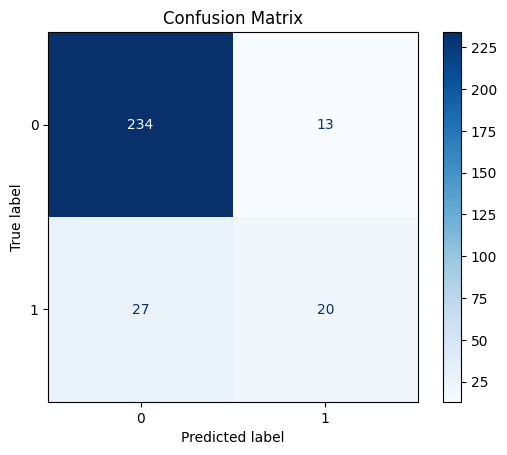

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert predicted probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


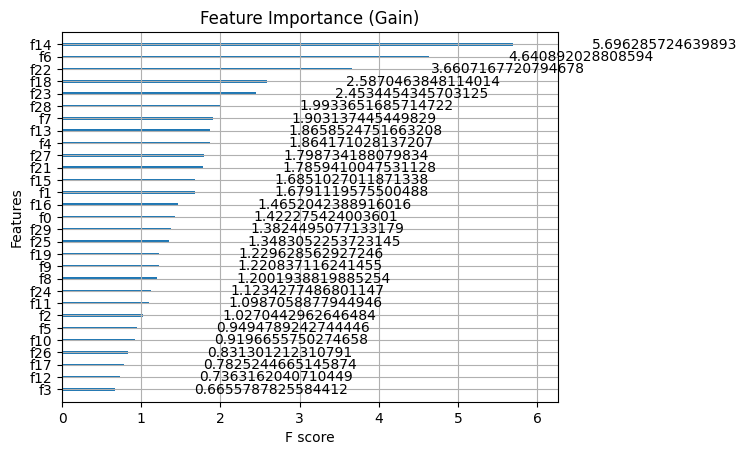

In [0]:
from xgboost import plot_importance
plot_importance(xgb, importance_type='gain')  # 'weight', 'cover' also available
plt.title("Feature Importance (Gain)")
plt.show()

In [0]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.title("ROC Curve")
plt.show()

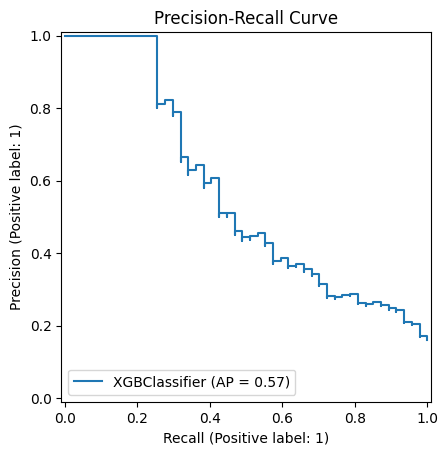

In [0]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(xgb, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()

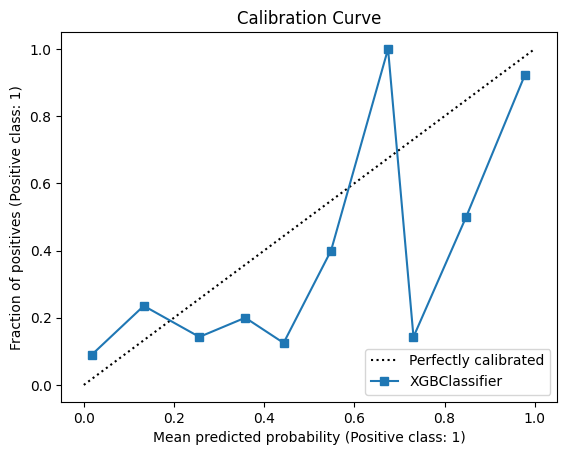

In [0]:
from sklearn.calibration import CalibrationDisplay
CalibrationDisplay.from_estimator(xgb, X_test, y_test, n_bins=10)
plt.title("Calibration Curve")
plt.show()